# Experimentos y análisis de Datos: Simulaciones de Formula 1 

Con el objetivo de recopilar informacion de interes de la simualcion y realizar posteriormente analisis estadisticos con los datos se llevaron a cabo 200 simulaciones aleatorias, cuyos resultados se guardaron en el archivo simulacion.csv .

Las variables extraidas y a partir de las cuales se trabajara a continuacion son:
de la carrera 
tiempo_promedio : tiempo promedio que demoraron los pilotos en completar la carrera
clima : condicion climatica del dia de la carrera
no_vueltas : numero de vueltas de la carrera
largo_pista : largo en metros de la pista
dificultad_pista : facil, media o dificil segun su curvatura principalmente
tiempo_promedio_vuelta : tiempo promedio en que se demora un piloto en hacer una vuelta a la pista

del piloto peor posicionado
dir_lento_deseo : estrategia del director 
car_lento_velocidad_max : velocidad maxima del carro 
lento_tiempo : tiempo de carrera 
lento_experiencia : anos de experiencia
lento_victorias : cantida dde victorias
lento_paradas : cantidad de pit stops realizados 
lento_confianza : nivel de confianza en el equipo tecnico
lento_velocidad_media : velocidad media con la que corrio

del piloto mejor posicionado
dir_rapido_deseo : estrategia del director 
car_rapido_velocidad_max : velocidad maxima del carro 
rapido_tiempo : tiempo de carrera 
rapido_experiencia : anos de experiencia
rapido_victorias : cantida dde victorias
rapido_paradas : cantidad de pit stops realizados
rapido_confianza :  nivel de confianza en el equipo tecnico
rapido_velocidad_media : velocidad media con la que corrio



## Analisis inicial e hipotesis sobre los datos

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

carreras = pd.read_csv('simulacion.csv')

def outlier_detect(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%', i]
        Q3 = df.describe().at['75%', i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        x = np.array(df[i])
        p = []
        for j in x:
            if j < LTV or j > UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i] = p
    return df

df = outlier_detect(carreras)

df['dificultad_pista'] = df['dificultad_pista'].map({'Difficulty.hard': 3, 'Difficulty.easy': 1, 'Difficulty.medium': 2 })


print(df.describe())

       tiempo_promedio       clima  no_vueltas   largo_pista  \
count       199.000000  199.000000  199.000000    199.000000   
mean        112.886717    2.527638    2.949749  16410.552764   
std          53.334607    1.140614    1.358656   9103.792039   
min          17.146301    1.000000    1.000000   1000.000000   
25%          71.288097    2.000000    2.000000   9200.000000   
50%         109.247136    2.000000    3.000000  15900.000000   
75%         152.746201    4.000000    4.000000  23450.000000   
max         267.718172    4.000000    5.000000  35900.000000   

       dificultad_pista  dir_lento_deseo  car_lento_velocidad_max  \
count        199.000000       199.000000               199.000000   
mean           2.005025         1.301508               401.638191   
std            0.235648         0.521795                59.796792   
min            1.000000         1.000000               300.000000   
25%            2.000000         1.000000               352.000000   
50%      

Impacto de la dificultad de la pista en el rendimiento de los pilotos: 

Se analizara si la dificultad de la pista tiene un impacto significativo en el rendimiento de los pilotos, tanto en términos de tiempo promedio como en otras variables de rendimiento. La hipótesis sería que la dificultad de la pista afecta de manera diferente al rendimiento de los pilotos ganadores y los que quedaron en último lugar.

In [49]:
import scipy.stats as stats
from scipy.stats import kruskal

grupos = df.groupby('dificultad_pista')

# Crear nuevos DataFrames para cada grupo
df_faccil = grupos.get_group(1)
df_media = grupos.get_group(2)
df_dificil = grupos.get_group(3)

# Ahora tienes tres DataFrames: df_faccil, df_media, df_dificil

lento_conf = df_faccil['lento_tiempo']
rapido_conf = df_faccil['rapido_tiempo']
print("Diferencias para pistas faciles")
stat, p = kruskal(rapido_conf, lento_conf)
print(f'Statistics={stat}, p={p}')

lento_conf = df_media['lento_tiempo']
rapido_conf = df_media['rapido_tiempo']

print("Diferencias para pistas de dificultad media")
stat, p = kruskal(rapido_conf, lento_conf)
print(f'Statistics={stat}, p={p}')

lento_conf = df_dificil['lento_tiempo']
rapido_conf = df_dificil['rapido_tiempo']

# Realiza la prueba de Kruskal-Wallis
print("Diferencias para pistas dificiles")
stat, p = kruskal(rapido_conf, lento_conf)
print(f'Statistics={stat}, p={p}')



Diferencias para pistas faciles
Statistics=5.770909090909086, p=0.01629360362102858
Diferencias para pistas de dificultad media
Statistics=197.29867028337455, p=8.11600119139247e-45
Diferencias para pistas dificiles
Statistics=4.333333333333336, p=0.0373729883406513


El resultado de tu prueba de Kruskal-Wallis sugiere que no hay una diferencia significativa en los tiempos de carrera entre los pilotos que quedaron en último lugar y los que ganaron, considerando la dificultad de la pista. Esto significa que, basándonos en los datos y el nivel de significancia utilizado (generalmente 0.05), no podemos rechazar la hipótesis nula y concluir que la dificultad de la pista tiene un impacto significativo en el rendimiento de los pilotos en términos de tiempo de carrera.

Comparacion de cantidad de pitstops segun el clima:

Analizar la cantidad de pitstops según el clima es de gran interés en el contexto de las carreras de Fórmula 1, ya que este puede tener un impacto significativo en el rendimiento de los pilotos y en la eficiencia de los equipos durante las paradas en boxes. La cantidad de pitstops puede revelar patrones y tendencias que pueden ayudar a los equipos a prepararse mejor para diferentes condiciones climáticas. Por ejemplo, si los equipos ganadores tienden a hacer más pitstops en días nublados o lluviosos que los perdedores, esto podría indicar que las paradas sistematicas en estos climas para mejorar las condiciones tecnicas del carro son importantes para el desenlace de la carrera.


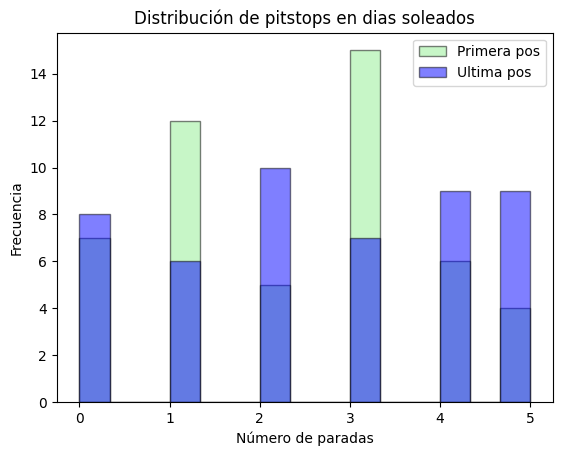

Soleado:
Primera posición: 2.2653061224489797
Última posición: 2.6122448979591835


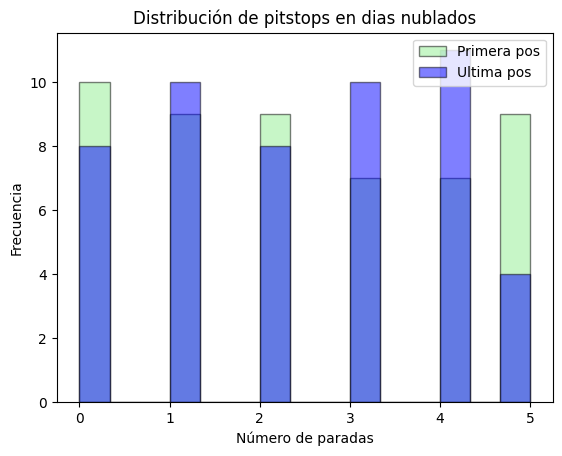

Nublado:
Primera posición: 2.372549019607843
Última posición: 2.3529411764705883


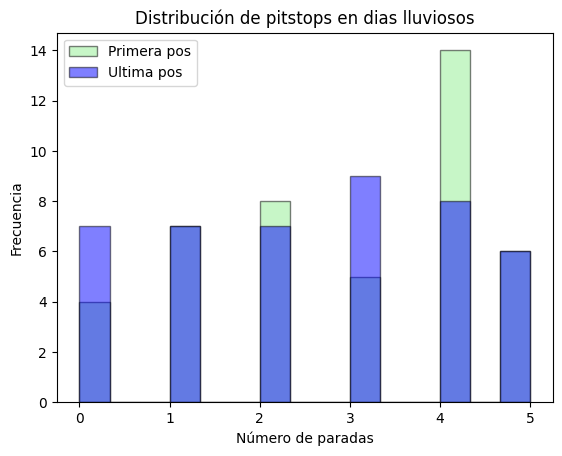

Lluvioso:
Primera posición: 2.8181818181818183
Última posición: 2.5


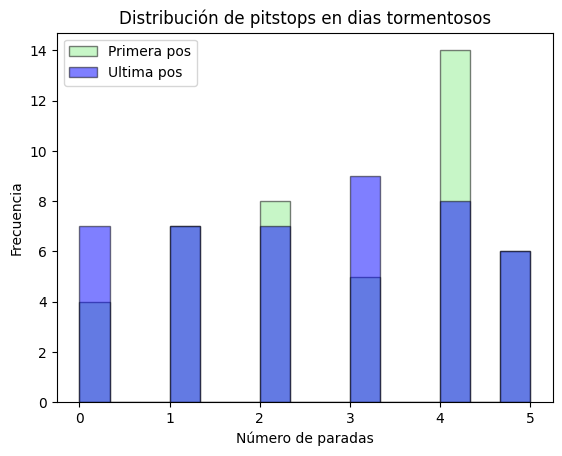

Tormentoso:
Primera posición: 2.8181818181818183
Última posición: 2.5


In [6]:

grupos = df.groupby('clima')

df_sunny = grupos.get_group(1)
df_cloudy = grupos.get_group(2)
df_rainy = grupos.get_group(3)
df_stormy = grupos.get_group(3)

# Media de paradas para pilotos en primera posición
media_lento_sunny = df_sunny['lento_paradas'].mean()
media_lento_cloudy = df_cloudy['lento_paradas'].mean()
media_lento_rainy = df_rainy['lento_paradas'].mean()
media_lento_stormy = df_stormy['lento_paradas'].mean()

# Media de paradas para pilotos en última posición
media_rapido_sunny = df_sunny['rapido_paradas'].mean()
media_rapido_cloudy = df_cloudy['rapido_paradas'].mean()
media_rapido_rainy = df_rainy['rapido_paradas'].mean()
media_rapido_stormy = df_stormy['rapido_paradas'].mean()

plt.hist(df_sunny['lento_paradas'], color='lightgreen', ec='black', bins=15, alpha=0.5, label='Primera pos')
plt.hist(df_sunny['rapido_paradas'], color='blue', ec='black', bins=15, alpha=0.5, label='Ultima pos')
plt.legend()
plt.title('Distribución de pitstops en dias soleados')
plt.xlabel('Número de paradas')
plt.ylabel('Frecuencia')
plt.show()

print("Soleado:")
print(f"Primera posición: {media_lento_sunny}")
print(f"Última posición: {media_rapido_sunny}")

plt.hist(df_cloudy['lento_paradas'], color='lightgreen', ec='black', bins=15, alpha=0.5, label='Primera pos')
plt.hist(df_cloudy['rapido_paradas'], color='blue', ec='black', bins=15, alpha=0.5, label='Ultima pos')
plt.legend()
plt.title('Distribución de pitstops en dias nublados')
plt.xlabel('Número de paradas')
plt.ylabel('Frecuencia')
plt.show()

print("Nublado:")
print(f"Primera posición: {media_lento_cloudy}")
print(f"Última posición: {media_rapido_cloudy}")

plt.hist(df_rainy['lento_paradas'], color='lightgreen', ec='black', bins=15, alpha=0.5, label='Primera pos')
plt.hist(df_rainy['rapido_paradas'], color='blue', ec='black', bins=15, alpha=0.5, label='Ultima pos')
plt.legend()
plt.title('Distribución de pitstops en dias lluviosos')
plt.xlabel('Número de paradas')
plt.ylabel('Frecuencia')
plt.show()

print("Lluvioso:")
print(f"Primera posición: {media_lento_rainy}")
print(f"Última posición: {media_rapido_rainy}")

plt.hist(df_stormy['lento_paradas'], color='lightgreen', ec='black', bins=15, alpha=0.5, label='Primera pos')
plt.hist(df_stormy['rapido_paradas'], color='blue', ec='black', bins=15, alpha=0.5, label='Ultima pos')
plt.legend()
plt.title('Distribución de pitstops en dias tormentosos')
plt.xlabel('Número de paradas')
plt.ylabel('Frecuencia')
plt.show()

print("Tormentoso:")
print(f"Primera posición: {media_lento_stormy}")
print(f"Última posición: {media_rapido_stormy}")



Como se especulaba al incio, los graficos y medias nos muestran que los equipos ganadores sí realizan mas paradas de pit cuando las condiciones del clima no son favorables. Esto nos lleva a pensar que el intercambio entre mecanicos y pilotos es bastante importante para obtener una buena posicion.

Diferencias en el nivel de confianza entre pilotos ganadores y los que quedaron en último lugar:

Compararemos las medias de las variables que miden la confianza entre los pilotos que quedaron en último lugar y los que ganaron la carrera. La hipotesis nula es que no hay diferencias significativas entre las medianas de los grupos. 

Se utilizara la prueba de Kruskal-Wallis ya que es una prueba no paramétrica que no asume que los datos sigan una distribución normal. 

In [47]:
from scipy.stats import kruskal

lento_conf = df['lento_confianza']
rapido_conf = df['rapido_confianza']

# Realiza la prueba de Kruskal-Wallis
stat, p = kruskal(rapido_conf, lento_conf)
print(f'Statistics={stat}, p={p}')



Statistics=5.446537840045688, p=0.019607146344147716


Los resultados de la prueba de Kruskal-Wallis, con `Statistics=5.446537840045688` y `p=0.019607146344147716`, indican que hay una diferencia estadísticamente significativa entre las medias de los grupos que se estan comparando. El valor p es 0.0196, que es menor que el nivel de significancia comúnmente utilizado de 0.05. Esto significa que se puede rechazar la hipótesis nula de que no hay diferencias significativas entre las medias de los grupos.

En el problema este es un resultado que se espera pues la confianza en el equipo de mecánicos es un factor clave para el desarrollo profesional de los pilotos. Los pilotos deben confiar en que su equipo de mecánicos les proporcionará retroalimentación constructiva y oportuna, lo que es esencial para mejorar su rendimiento y aprender de sus errores. Si un piloto descubre que su equipo no le esta proporcionando informacion actualizada/correcta es mas probable que se enoje y planee sabotear su actuacion en la carrera, haciendo que quede en ultima posicion.



## Correlación entre Variables

La matriz de correlación puede ser útil para identificar relaciones entre variables que podrían ser relevantes para la toma de decisiones, como el diseño de pistas de carreras, la planificación de horarios de conducción, o el desarrollo de estrategias de marketing dirigidas a diferentes segmentos de conductores.


                          tiempo_promedio     clima  no_vueltas  largo_pista  \
tiempo_promedio                  1.000000  0.032156   -0.086708     0.073260   
clima                            0.032156  1.000000   -0.145755     0.039101   
no_vueltas                      -0.086708 -0.145755    1.000000    -0.112776   
largo_pista                      0.073260  0.039101   -0.112776     1.000000   
dificultad_pista                -0.046286  0.046456   -0.014982     0.048001   
dir_lento_deseo                 -0.321117 -0.090445   -0.014141    -0.020023   
car_lento_velocidad_max         -0.045329 -0.049391    0.043104    -0.118491   
lento_tiempo                     0.083450 -0.074635    0.008216    -0.032299   
lento_experiencia                0.077099 -0.075534   -0.008371    -0.061313   
lento_victorias                  0.017919  0.023600   -0.025034    -0.144916   
lento_paradas                    0.037474  0.036702   -0.049032     0.123574   
lento_confianza                 -0.06097

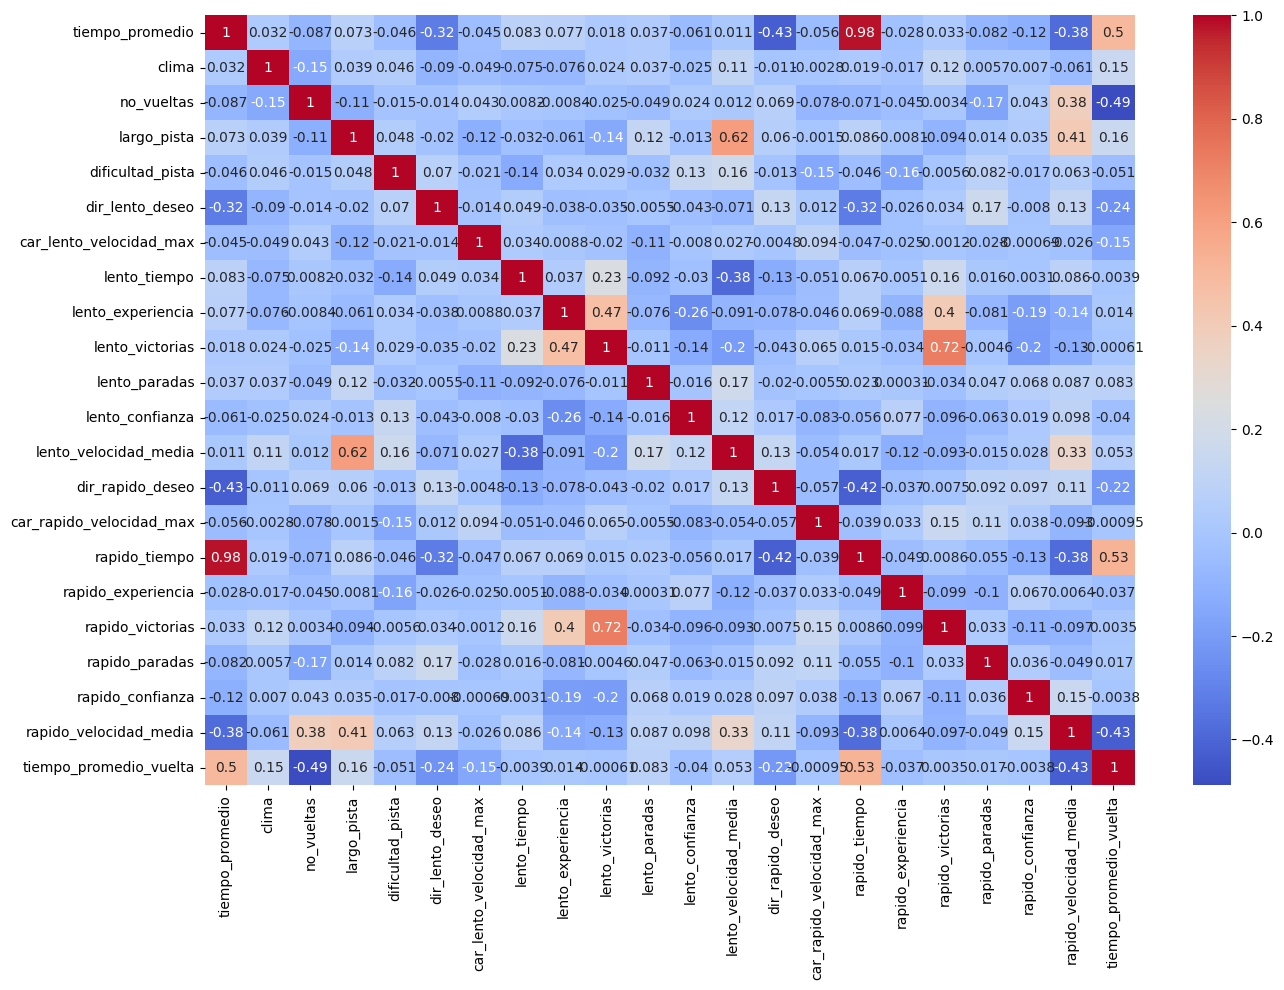

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


En general la matriz obtenida no posee fuertes relaciones entre las variables, pero de igual manera se pueden apreciar algunas.

Variables fuertemente correlacionadas: Por ejemplo, tiempo_promedio y lento_tiempo tienen un coeficiente de correlación de 0.978858, lo que indica una fuerte correlación positiva. Esto es evidente ya que el tiempo mas lento de la carrera tambien es utilizado para calcular el promedio de la misma. Lo mismo ocurre con el tiempo mas rapido de la carrera.

Variables con correlación moderada: Por ejemplo, largo_pista y rapido_tiempo tienen un coeficiente de correlación de 0.086430, lo que indica una correlación moderada. Esto sugiere que existe una relación entre el largo de la pista y el tiempo mas rápido en completar la carrera, pero no tan fuerte como en otros pares de variables. Entre tiempo_promedio y largo_pista: 0.073260. Aunque este coeficiente es positivo, su magnitud es baja. Esto indica que a medida que el largo de la pista tiende a aumentar, el tiempo promedio tambien.



## Predicciones a partir de los datos 

Prediccion del peor tiempo:

Predecir el tiempo de los perdedores en una carrera de Fórmula 1 es interesante porque permite a los equipos y a los analistas de datos anticipar los resultados de las carreras con mayor precisión. Esto es crucial para la toma de decisiones estratégicas, como la planificación de paradas en boxes y ajustes de estrategia durante la carrera, lo que puede marcar la diferencia entre ganar y perder.

Este problema se afrontara con una regresion lienal clasica.


In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = carreras[[ 'largo_pista', 'lento_tiempo']] #'lento_paradas']]
       #'dir_lento_deseo','no_vueltas', 'car_lento_velocidad_max', 'clima']]#, 'lento_experiencia'

y = carreras['lento_velocidad_media']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)


                              OLS Regression Results                             
Dep. Variable:     lento_velocidad_media   R-squared:                       0.529
Model:                               OLS   Adj. R-squared:                  0.523
Method:                    Least Squares   F-statistic:                     87.65
Date:                   Thu, 02 May 2024   Prob (F-statistic):           3.06e-26
Time:                           08:42:57   Log-Likelihood:                -728.27
No. Observations:                    159   AIC:                             1463.
Df Residuals:                        156   BIC:                             1472.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           69

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 750.6931821679555
Coeficiente de Determinación R^2: 0.44769108461149776


El modelo no nos brinda los mejores resultados y nos indica que pueden existir problemas numericos en nuetsros datos, esto es sin duda debido a la forma de generla los mismos a traves de simulaciones aleatorias. Analicemos los supuestos:

In [39]:
residuos = model.resid

La media de los errores es cero y la suma de los errores es cero.

In [40]:
media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -8.58013869597102e-15
La media de los residuos es cero.
Suma de los residuos: -1.3642420526593924e-12
La suma de los residuos es cero.


Los errores no poseen una distribución normal, por lo que no se cumplen los supuestos del modelo, pero se debe notar la linealidad que se observa en el grafico QQ y indica que es muy probable que lo que le falte al modelo para ser correcto es alguna variable que no se tuvo en cuenta a la hora de recopilar los datos. Esto se corresponderia al alto valor del coeficiente de la constante que nos devuleve el modelo en su summary. 


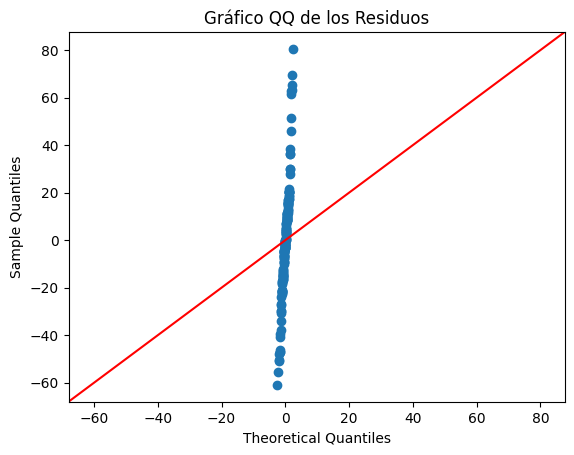

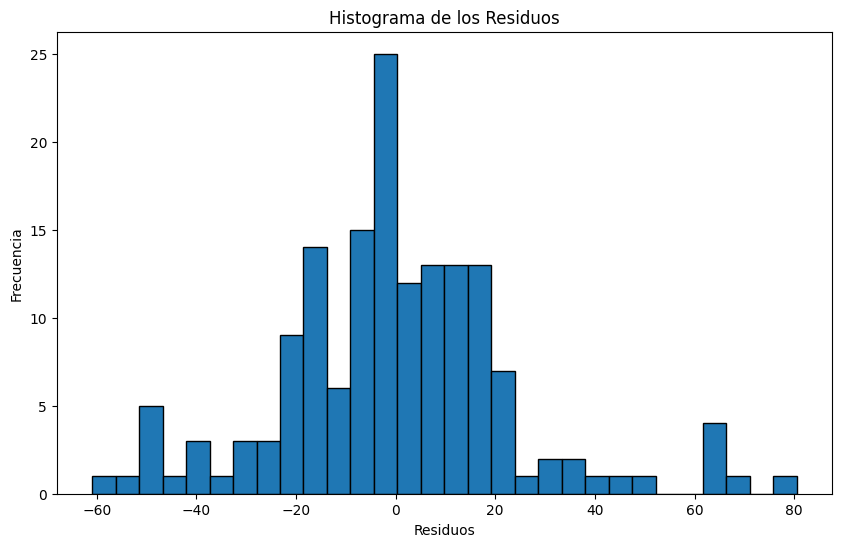

D = 0.4455103225569147, p-value = 2.74097366569152e-29
Los residuos no parecen estar normalmente distribuidos.


In [41]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

Independencia de los residuos

In [42]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 1.9839197027177378
No hay autocorrelación en los residuos.


Supuesto de Homocedasticidad.

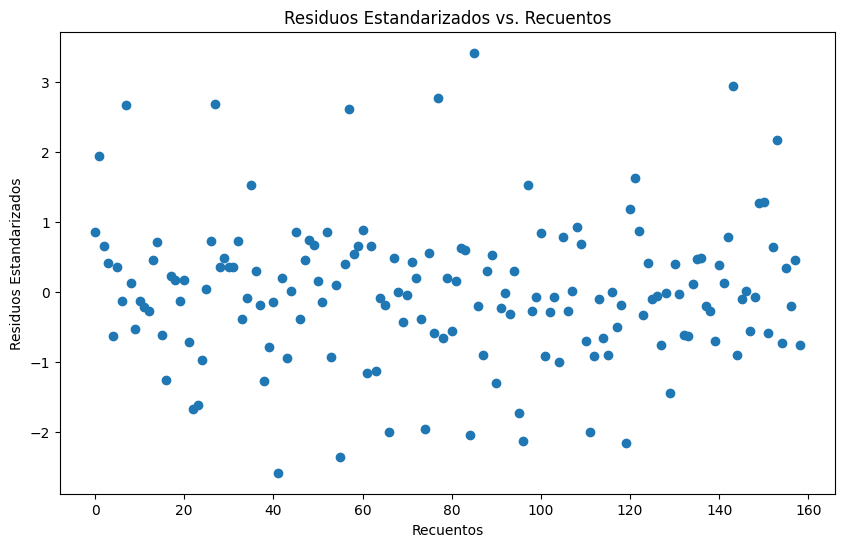

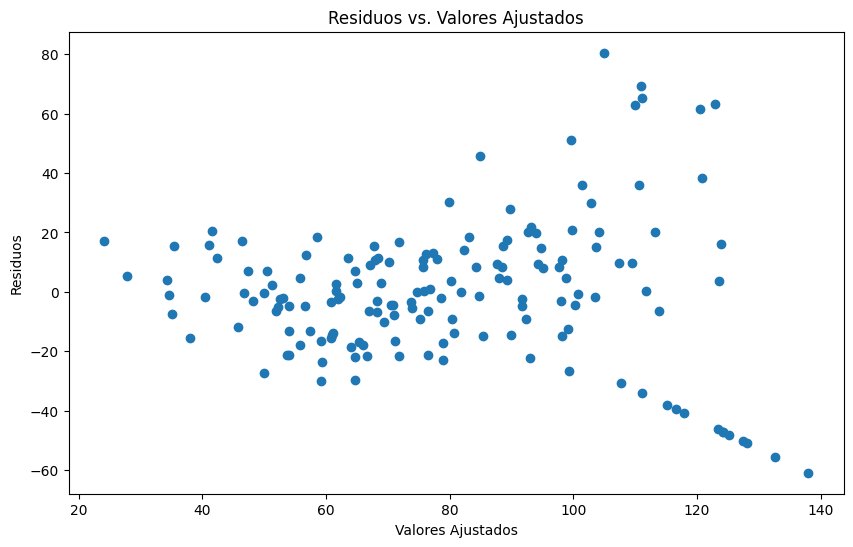

[('Lagrange multiplier statistic', 57.03531068060159), ('p-value', 4.1204025653387545e-13), ('f-value', 43.63034166809906), ('f p-value', 8.91474092915613e-16)]


In [43]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

Prediccion del tiempo promedio de una carrera:

El interés en predecir el tiempo medio de una carrera a partir de variables como el clima, el número de vueltas, el largo de la pista y la dificultad de la pista radica en la capacidad de anticipar y optimizar el rendimiento deportivo. La predicción precisa del tiempo medio puede ser crucial para la planificación de entrenamientos, la asignación de recursos y la toma de decisiones estratégicas en competencias deportivas. Al entender cómo estas variables influyen en el tiempo de carrera, los directores y pilotos pueden ajustar sus estrategias para mejorar el rendimiento, ya sea reduciendo el tiempo de carrera o preparándose adecuadamente para condiciones específicas. 

El uso de un árbol de decisión en la predicción del tiempo medio de una carrera a partir de variables como el clima, el número de vueltas, el largo de la pista y la dificultad de la pista es particularmente útil debido a su capacidad para manejar relaciones no lineales entre las variables predictivas y la variable objetivo. Los árboles de decisión son modelos de aprendizaje automático que pueden capturar complejidades y patrones no lineales en los datos, lo que los hace ideales para problemas donde las relaciones entre las variables no se pueden expresar fácilmente mediante ecuaciones lineales. Además, los árboles de decisión son fáciles de interpretar, lo que permite entender las decisiones tomadas por el modelo basadas en las características predictivas, lo cual es crucial en aplicaciones donde la explicabilidad del modelo es importante.


Error cuadrático medio (MSE): 6761.359826951349


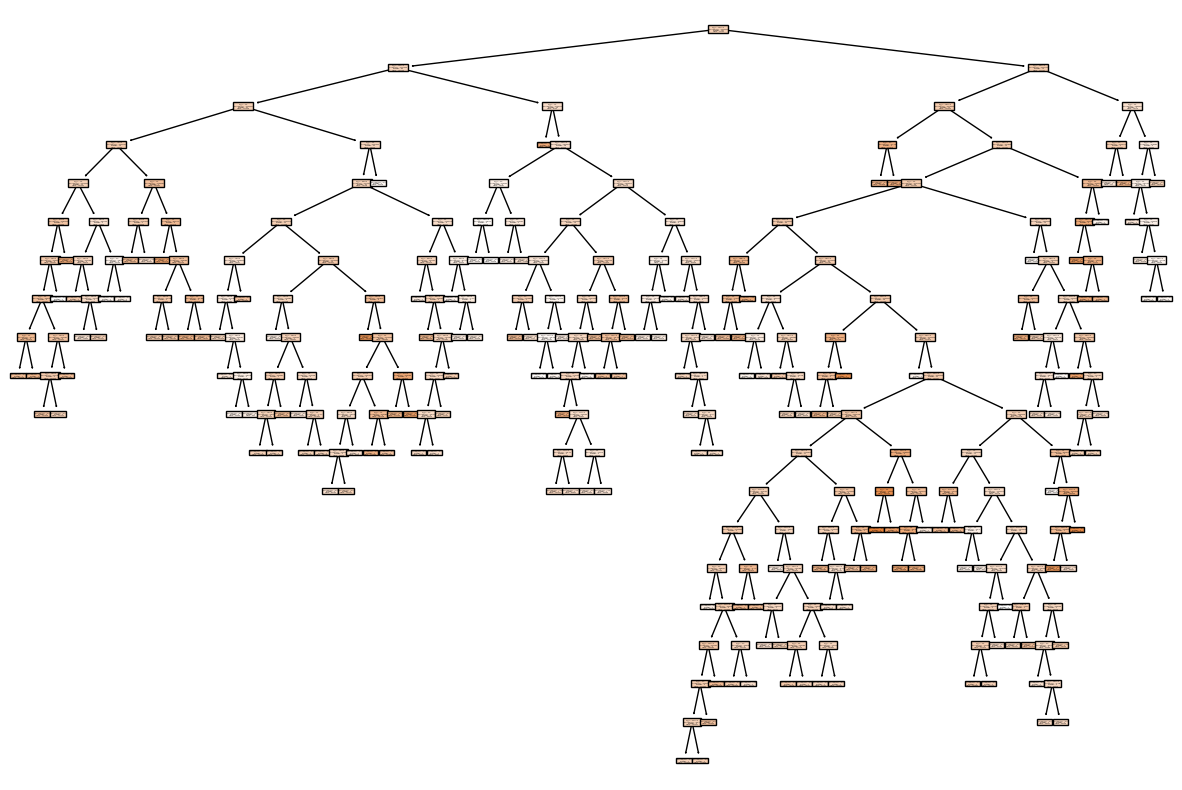

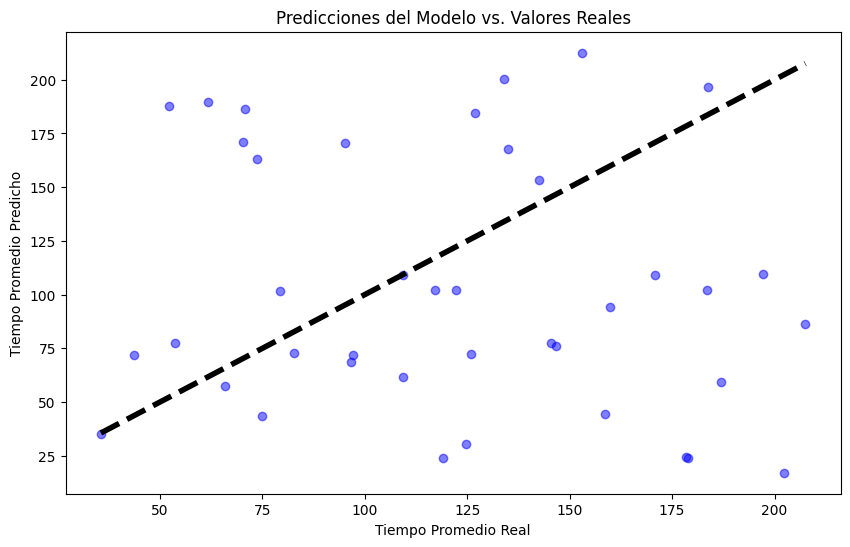

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = df[['clima', 'no_vueltas', 'largo_pista', 'dificultad_pista']]
y = df['tiempo_promedio'] # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Tiempo Promedio Real')
plt.ylabel('Tiempo Promedio Predicho')
plt.title('Predicciones del Modelo vs. Valores Reales')
plt.show()


Este modelo nos devuelve resultados desastrosos para la prediccion. Se puede observar un error cuadratico medio (MSE) de 6761.359826951349, lo que sugiere que hay una amplia discrepancia entre los tiempos promedio predichos por el modelo y los tiempos promedio reales, lo que indica que el modelo posee baja presicion. El grafico nos ilustra este comportamineto.

Se pasa entonces a aplicar la técnica de regresion lineal, especialmente adecuada cuando se identifica una relación lineal entre las variables independientes (como las mencionadas) y la variable dependiente (el tiempo medio de la carrera). La regresión lineal permite modelar esta relación y hacer predicciones precisas sobre el tiempo medio de la carrera basándose en las condiciones específicas de cada carrera. 

Error cuadrático medio (MSE): 2463.4422789848904


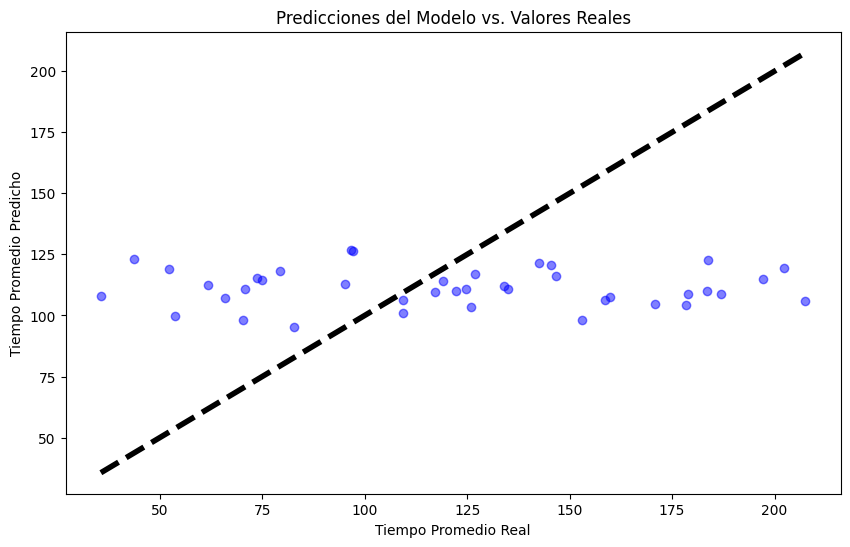

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['clima', 'no_vueltas', 'largo_pista', 'dificultad_pista']] # Características predictivas
y = df['tiempo_promedio'] # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Tiempo Promedio Real')
plt.ylabel('Tiempo Promedio Predicho')
plt.title('Predicciones del Modelo vs. Valores Reales')
plt.show()


Al comparar los resultados de la regresión lineal y el árbol de decisión, se observa que el modelo de regresión lineal tiene un Error Cuadrático Medio (MSE) de 2463.44, mucho mas bajo que el obtenido anteriormente. Esto indica que el modelo de regresión lineal tiene un rendimiento mejor en términos de cuán bien predice el tiempo medio de una carrera en comparación con el modelo de árbol de decisión. En general, un MSE más bajo sugiere que el modelo tiene un mejor ajuste a los datos, lo que se traduce en predicciones más precisas. En este contexto, el modelo de regresión lineal parece ser más efectivo para predecir el tiempo medio de una carrera basándose en las variables dadas, lo que podría ser debido a la relación lineal entre las variables predictivas y la variable objetivo, una característica que la regresión lineal puede modelar de manera más efectiva que el árbol de decisión, especialmente cuando la relación entre las variables es no lineal o cuando las características interactúan entre sí.

Sin embargo, no se considera ninguno de estos modelos lo suficientemente buenos para realizar predicciones a futuro.

## Comparacion de datos extraidos de la simulacion y datos reales 

Se optó por analizar el tiempo por vueltas en lugar de por carreras debido a la variabilidad inherente en las carreras de Fórmula 1. La variabilidad en la cantidad de vueltas, combinada con las diferencias en el tamaño y la longitud de los circuitos, introduce múltiples factores que pueden afectar significativamente los tiempos finales de la carrera. Al analizar el tiempo por vueltas, se busca una medida más consistente y comparable que refleje mejor las diferencias en el rendimiento entre las vueltas en diferentes carreras y entre los datos reales de la Fórmula 1 y los resultados de la simulación.

Los datos se obtuvieron del dataset Formula 1 World Championship (1950 - 2023), especificamente del archivo lap_times.csv, descargado de Kaggle.com y que se muestra como el mas completo en relacion a datos historicos de F1.


In [46]:
import pandas as pd
vueltas = pd.read_csv('lap_times.csv')
df = pd.read_csv('simulacion.csv')

vueltas = pd.read_csv('lap_times.csv')
df = pd.read_csv('simulacion.csv')

vueltas['milliseconds_en_segundos'] = vueltas['milliseconds'] / 1000

diferencia_media = vueltas['milliseconds_en_segundos'].mean() - df['tiempo_promedio_vuelta'].mean()

print("Datos Reales")
print(vueltas['milliseconds_en_segundos'].describe())
print(" ")
print("Datos simulados")
print(df['tiempo_promedio_vuelta'].describe())

Datos Reales
count    551742.000000
mean         95.706206
std          74.786046
min          55.404000
25%          81.993000
50%          90.673000
75%         102.243000
max        7507.547000
Name: milliseconds_en_segundos, dtype: float64
 
Datos simulados
count     199.000000
mean       90.638261
std       505.296442
min         4.843068
25%        21.946332
50%        40.787363
75%        71.746325
max      7154.676887
Name: tiempo_promedio_vuelta, dtype: float64


Media (mean): La media de los datos reales es 95.706206 segundos, mientras que la media de los simulados es 90.638261 segundos. Aunque una es ligeramente mayor, la diferencia es relativamente pequeña y puede estar dentro del rango de variabilidad esperado.

Desviación Estándar (std): La desviación estándar de milliseconds_en_segundos es 74.786046 segundos, y la de tiempo_promedio_vuelta es 505.296442 segundos. La desviación estándar de tiempo_promedio_vuelta es significativamente mayor, lo que indica una mayor variabilidad en los datos de la simulación en comparación con los datos reales de la Fórmula 1. Esto puede deberse a la manera en la que son generados.

Valores Mínimos (min): El valor mínimo de milliseconds_en_segundos es 55.404000 segundos, mientras que el valor mínimo de tiempo_promedio_vuelta es 4.843068 segundos. La diferencia en los valores mínimos sugiere que los tiempos de vuelta en la simulación pueden ser significativamente más cortos que los tiempos de vuelta reales en la Fórmula 1.

Valores Máximos (max): El valor máximo de milliseconds_en_segundos es 7507.547000 segundos, y el valor máximo de tiempo_promedio_vuelta es 7154.676887 segundos. Aunque hay una diferencia significativa en los valores máximos, esto puede ser atribuido a la naturaleza de los datos y a la variabilidad inherente en los tiempos de vuelta.

Conclusión:
La comparación valor a valor entre las estadísticas descriptivas de milliseconds_en_segundos y tiempo_promedio_vuelta revela diferencias significativas en la variabilidad y en los valores extremos. La desviación estándar y los valores mínimos y máximos sugieren que los datos de la simulación pueden no reflejar con precisión la variabilidad y los tiempos de vuelta en la Fórmula 1 real. Se debe tener en cuenta ademas la diferencia entre los tamanos de las muestras, quizas con un mayor numero de simulaciones los valores se acerquen mas a los reales.
Aun asi, estos valores resultan sorprendentemente cercanos a los observados a lo largo de la historia en las carreras de F1, sobre todo los valores de la media. Esta es una conclusion bastante alentadora con respecto a la correctitud de la simulacion.